#Tema: Sequência lógica


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
#importando planilha com respostas
df = pd.read_csv('sample_data/preteste_aula1.csv')
df.head()

,Carimbo de data/hora,1. O que é necessário para organizar uma sequência de passos correta?,2. Em qual das situações abaixo há um exemplo de padrão?,3. Qual das opções representa um exemplo de lógica?,4. O que significa reconhecer padrões?,5. Qual das opções melhor representa uma sequência lógica de ações?
0,10/07/2025 09:14:00,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
1,10/07/2025 09:14:06,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
2,10/07/2025 09:14:13,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
3,10/07/2025 09:14:36,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
4,10/07/2025 09:14:49,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"


In [4]:
#renomea colunas
df.columns= ['timestamp', 'q1','q2', 'q3', 'q4','q5']
#remove espaços em branco
for coluna in df.columns[1:]:
  df[coluna].astype(str).str.strip()

df.head()

,timestamp,q1,q2,q3,q4,q5
0,10/07/2025 09:14:00,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
1,10/07/2025 09:14:06,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
2,10/07/2025 09:14:13,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
3,10/07/2025 09:14:36,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"
4,10/07/2025 09:14:49,C) Seguir uma lógica e manter a ordem correta ...,"B) Uma sequência de cores se repete: vermelho,...","C) Identificar que, se está chovendo, é melhor...",C) Perceber elementos que se repetem e organiz...,"C) Jantar, escovar os dentes, dormir"


In [11]:
#função para contar quantidade de respostas para cada alternativa
def conta_respostas(df, coluna,numero_questao):
  respostas = df[coluna].value_counts()
  total = len(df[coluna].dropna())
  total_alternativas = {'A': 0, 'B': 0, 'C': 0, 'D': 0  }
  porcentagem = {'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0}

  for resposta, frequencia in respostas.items():
    if pd.notna(resposta) and len(str(resposta)) > 0:
      alternativa = str(resposta)[0].upper() #extrai apenas primeira letra da resposta
      if alternativa in total_alternativas :
        total_alternativas[alternativa] += frequencia
  #calcula porcentagem de escolha para cada alternativa
  if total > 0:
    for i in total_alternativas:
        porcentagem[i] = (total_alternativas[i] / total) * 100

  return total_alternativas,porcentagem, total


In [17]:
#exibe resultados
contagens = {}
totais = {}

for questao, coluna in enumerate(['q1', 'q2', 'q3', 'q4', 'q5'], 1):
    # Desempacotamos os 3 valores, mas usamos a porcentagem apenas para o 'print'
    total_alt, porcentagem_alt, total = conta_respostas(df, coluna, questao)


    contagens[f'Q{questao}'] = total_alt
    totais[f'Q{questao}'] = total

    print(f"Questão {questao}:")
    print()
    print(f"Total de respostas: {total}")
    print()
    print(f"{'Alternativa':<15} {'Quantidade':<15} {'Porcentagem (%)'}")
    print()

    for alternativa in ['A', 'B', 'C', 'D']:
        qtd = total_alt[alternativa]
        porc = porcentagem_alt[alternativa]

        print(f"{alternativa:<15} {qtd:<15} {porc:>6.1f}%")
    print("-" *80)
    print()

Questão 1:

Total de respostas: 163

Alternativa     Quantidade      Porcentagem (%)

A               1                  0.6%
B               3                  1.8%
C               158               96.9%
D               1                  0.6%
--------------------------------------------------------------------------------

Questão 2:

Total de respostas: 163

Alternativa     Quantidade      Porcentagem (%)

A               13                 8.0%
B               148               90.8%
C               0                  0.0%
D               2                  1.2%
--------------------------------------------------------------------------------

Questão 3:

Total de respostas: 163

Alternativa     Quantidade      Porcentagem (%)

A               3                  1.8%
B               0                  0.0%
C               157               96.3%
D               3                  1.8%
--------------------------------------------------------------------------------

Questão 4:

Tota

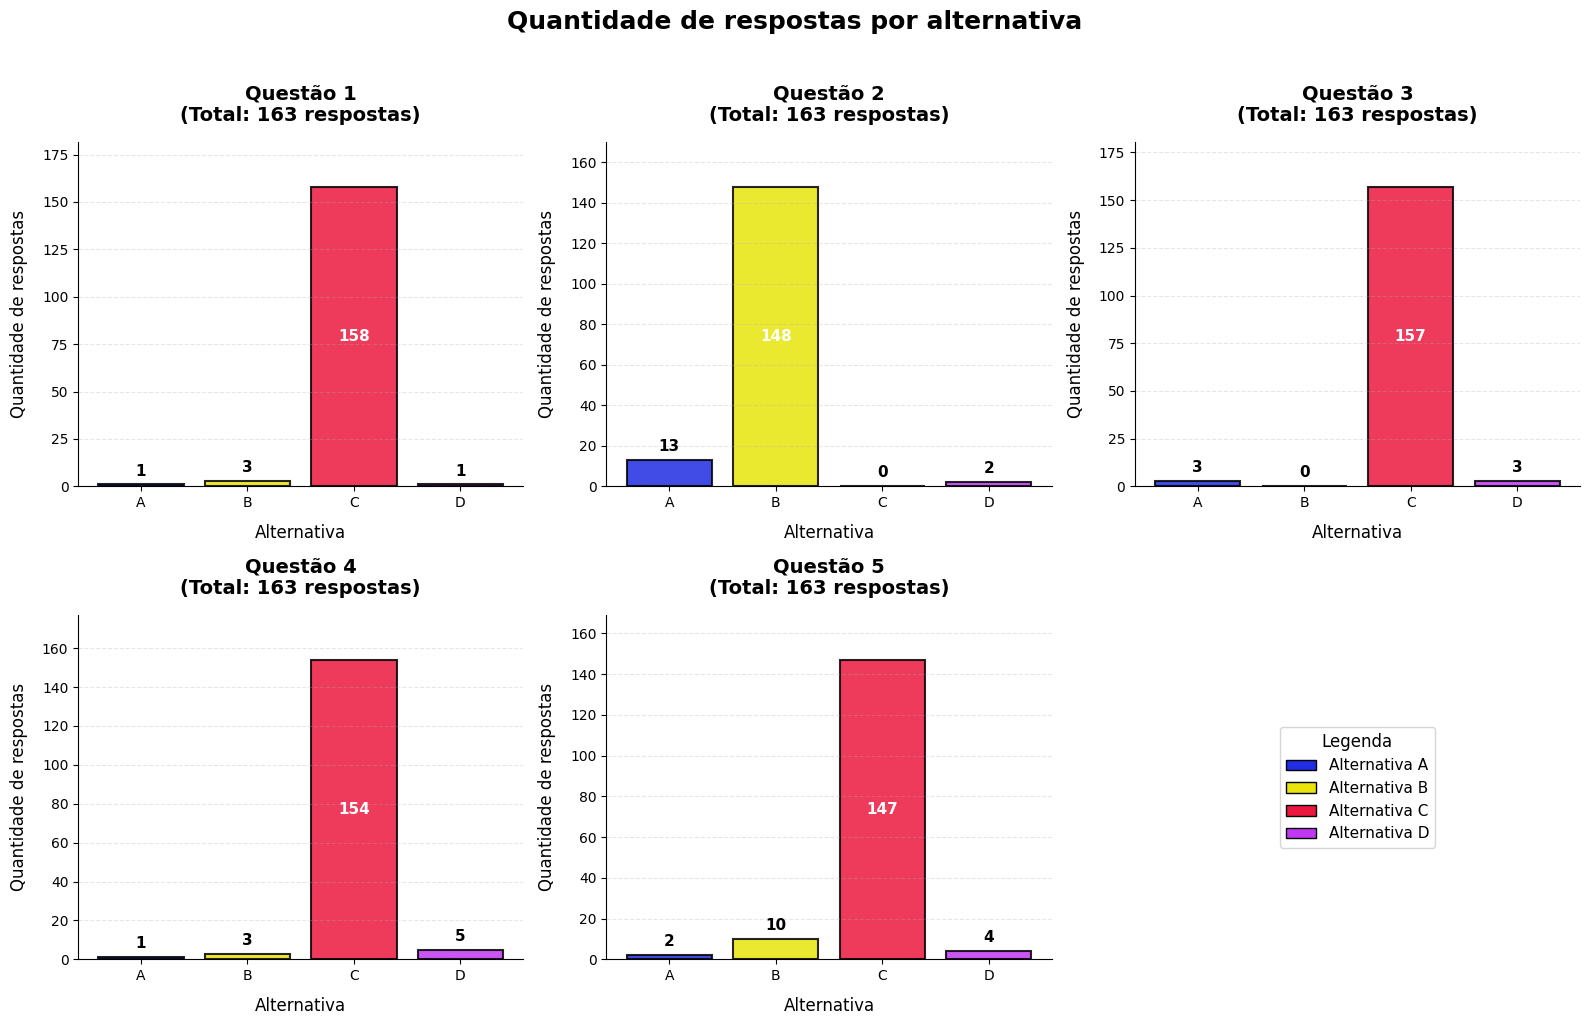

In [26]:
#exibe grafico para cada questao

# Configura figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Quantidade de respostas por alternativa',
             fontsize=18, fontweight='bold', y=1.02)

# Cores para cada barra
cores = {
    'A': '#202de3',  # azul
    'B': '#e8e40c',  # laranja
    'C': '#eb173e',  # vermelho
    'D': '#c138f2'   # roxo
} #e8e40c
#f7cc65

# legenda
nomes_alternativas = {
    'A': 'Alternativa A',
    'B': 'Alternativa B',
    'C': 'Alternativa C',
    'D': 'Alternativa D'
}

# Plotar cada questão
questoes = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
titulos = ['Questão 1', 'Questão 2', 'Questão 3', 'Questão 4', 'Questão 5']

for idx, (questao, titulo) in enumerate(zip(questoes, titulos)):
    ax = axes[idx // 3, idx % 3]

    dados = contagens[questao]
    total_questao = totais[questao]


    alternativas = []
    quantidades = []
    cores_barras = []

    for alt in ['A', 'B', 'C', 'D']:
        #if dados[alt] >= 0:
            alternativas.append(alt)
            quantidades.append(dados[alt])
            cores_barras.append(cores[alt])

    if alternativas:
        # Cria grafico
        bars = ax.bar(alternativas, quantidades, color=cores_barras,
                     edgecolor='black', linewidth=1.5, alpha=0.85)

        # Configurações do gráfico
        ax.set_title(f'{titulo}\n(Total: {total_questao} respostas)',
                    fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel('Alternativa', fontsize=12, labelpad=10)
        ax.set_ylabel('Quantidade de respostas', fontsize=12, labelpad=10)

        # Definir limite do eixo Y
        max_qtd = max(quantidades)
        ax.set_ylim(0, max_qtd * 1.15)

        # Adicionar grade para facilitar leitura
        ax.grid(axis='y', alpha=0.3, linestyle='--')

        # Adiciona quantidade sobre as barras
        for bar, qtd in zip(bars, quantidades):
            height = bar.get_height()

            if height > max_qtd * 0.8:
                text_color = 'white'
                text_y = height * 0.5
                va = 'center'
            else:
                text_color = 'black'
                text_y = height + max_qtd * 0.02
                va = 'bottom'

            ax.text(bar.get_x() + bar.get_width()/2., text_y,
                   f'{qtd}', ha='center', va=va,
                   color=text_color, fontsize=11, fontweight='bold')




        # Remover bordas desnecessárias
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
    else:
        ax.text(0.5, 0.5, 'Sem dados disponíveis',
               ha='center', va='center', fontsize=12)
        ax.set_title(titulo, fontweight='bold')
        ax.axis('off')


axes[1, 2].axis('off')


from matplotlib.patches import Patch

# Cria elementos de legenda
legend_elements = [Patch(facecolor=cores[alt], edgecolor='black',
                        label=nomes_alternativas[alt])
                  for alt in ['A', 'B', 'C', 'D']]

# Adiciona legenda para as cores
axes[1, 2].legend(handles=legend_elements, loc='center',
                 fontsize=11, title='Legenda',
                 title_fontsize=12)
axes[1, 2].axis('on')
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])
for spine in axes[1, 2].spines.values():
    spine.set_visible(False)

plt.tight_layout()